# Matemática para Ciencia de los Datos
# Trabajo Práctico 2

Profesor: Luis Alexánder Calvo Valverde 

Instituto Tecnológico de Costa Rica, 

Programa Ciencia de Datos

---

Fecha de entrega: Lunes 8 de Mayo del 2023, a más tardar a las 3:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ). 

Estudiante(s):
1. **Ricardo Chacon**
1. **Gabriel Valentine**



---

**Pregunta 1**

Considerando que la transpuesta de una matriz es el resultado de cambiar las filas a columnas. Sea una matriz $A\in\mathbb{R}^{m\times n}$, su transpuesta se escribe como $A^{T}\in\mathbb{R}^{n\times m}$ y sus entradas están dadas por: 

\begin{equation}
\left(A^{T}\right)_{i,j}=A_{j,i}.
\end{equation}

Proponga Usted dos matrices, $A\in\mathbb{R}^{4\times 3}$ y $B\in\mathbb{R}^{3\times 4}$ (no las busque en Internet, trate de proponer los valores por si mismo), y utilizando numpy muestre que las siguientes propiedades se cumplen con sus matrices propuestas.

**Note** que ni A ni B son cuadradas, y no tienen las mismas dimensiones.


**1.1 (15 puntos)**

- $\left(A^{T}\right)^{T}=A$


In [6]:
import numpy as np

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

B = np.array([[2, 3, 4, 5],
              [6, 7, 8, 9],
              [10, 11, 12, 13]])

# calcular la transpuesta del producto AB
AB_T = np.transpose(np.dot(A, B))

# calcular el producto de las transpuestas de B y A en orden inverso
B_T_A_T = np.dot(np.transpose(B), np.transpose(A))

print(AB_T == B_T_A_T)








[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


**1.2 (15 puntos)**

- $\left(AB\right)^{T}=B^{T}A^{T}$


In [7]:
import numpy as np

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

B = np.array([[2, 3, 4, 5],
              [6, 7, 8, 9],
              [10, 11, 12, 13]])

# calcular la transpuesta del producto AB
AB_T = np.transpose(np.dot(A, B))

# calcular el producto de las transpuestas de B y A en orden inverso
B_T_A_T = np.dot(np.transpose(B), np.transpose(A))

print(AB_T == B_T_A_T)



[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


**1.3 (15 puntos)**

Para este ejercicio, **proponga dos matrices de igual dimensionalidad**


- $\left(A+B\right)^{T}=A^{T}+B^{T}$.


In [8]:
import numpy as np

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

B = np.array([[2, 3, 4],
              [5, 6, 7],
              [8, 9, 10]])


# calcular la transpuesta de la suma A+B
sum_AB_T = np.transpose(A + B)

# calcular la transpuesta de A y B, y luego su suma
A_T_B_T_sum = np.transpose(A) + np.transpose(B)

print(sum_AB_T == A_T_B_T_sum)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


---

**Pregunta 2**


Un conjunto de vectores $\left\{ \vec{x}_{1},\vec{x}_{2},\ldots,\vec{x}_{n}\right\} \in\mathbb{R}^{m}$ se dice que es linealmente independiente, si ningún vector de tal conjunto puede ser representado como una combinación lineal del resto de vectores. De lo contrario, si uno de los vectores en tal conjunto puede ser representado como una combinación lineal del resto de vectores, entonces los vectores son linealmente dependientes, lo que se expresa como: 

\begin{equation}
\vec{x}_{j}=\sum_{i=1}^{n-1}\alpha_{i}\vec{x}_{i}
\end{equation}

para cualquier conjunto de valores escalares $\alpha_{1},\ldots,\alpha_{n-1}\in\mathbb{R}$ se dice que el vector $\vec{x}_{j}\in\mathbb{R}^{m}$ es linealmente dependiente de los vectores $\vec{x}_{i}$. 


**2.1 (15 puntos)**

Proponga una matriz $A\in\mathbb{R}^{4\times 3}$, cuyos vectores columnas sean linealmente independientes, calcule su rango para mostrar que es de rango $3$ (puede utilizar matrix_rank).


In [20]:
from numpy.linalg import matrix_rank


A = np.matrix([[1, 3, 4], [-8, 1 ,0], [-12, 8, 9], [7, 13, -7]])
matrix_rank(A)


3

**2.2 (15 puntos)**

Ahora haga los cambios necesarios a su matriz de manera que pase a rango $2$. 

In [21]:
from numpy.linalg import matrix_rank

A = np.matrix([[1, 3, 4], [-8, -24 ,0], [-12, -36, 9], [7, 21, -7]])
matrix_rank(A)





2

---

**Pregunta 3 (25 puntos)**

Utilizando el archivo "Dataset_usar.csv", haga:
- Cargue el archivo.
- Utilizando el modelo $Ax=b$
    - Conforme la matriz $A$ con las primeras 8 columnas.
    - Conforme el vector $b$ con la última columna de la derecha.
    - Calcule el vector de pesos ($x$), del tipo $A^{-1}b=x$
    - Calcule un b_estimado con $A$ e $x$
    - Calcule la norma 2 de la diferencia entre b y b_estimado.
    - Grafique b y b_estimado.



In [2]:
import pandas as pd
dataframe = pd.read_csv(r'C:\Users\chaconri\Desktop\Data Science TEC\Dataset_usar.csv')

   





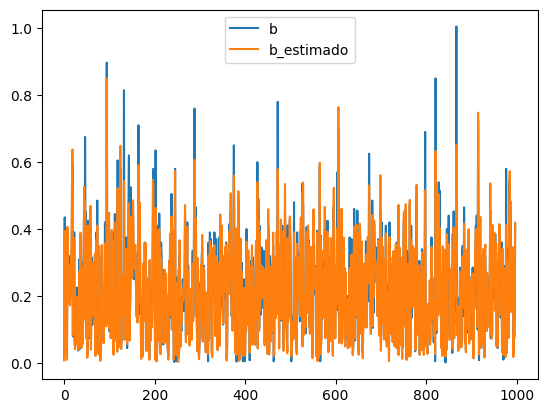

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar archivo
df = pd.read_csv('Dataset_usar.csv', sep=';', na_values='NaN')

# Reemplazar valores faltantes con el valor promedio de la columna
df = df.fillna(df.mean())

#  matriz A con las primeras 8 columnas
A = df.iloc[:, :8].values.astype(np.float64)

#  ector b con la última columna de la derecha
b = df.iloc[:, -1].values.astype(np.float64)

#  solución de mínimos cuadrados
x, _, _, _ = np.linalg.lstsq(A, b, rcond=None)

#  b_estimado
b_estimado = A @ x

#  norma 2 de la diferencia entre b y b_estimado
norma = np.linalg.norm(b - b_estimado, ord=2)

# Graficar b y b_estimado
plt.plot(b, label='b')
plt.plot(b_estimado, label='b_estimado')
plt.legend()
plt.show()



